## **Übung 2_1: Implementierung der Hauptkomponentenanalyse**

**Package Import**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
pd.show_versions(as_json=False)
np.__version__

Einlesen der Daten

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
cols = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','TGT']
boston = pd.read_csv(url,sep=' ',skipinitialspace=True,header=None,names=cols,index_col=False)

**crim**
per capita crime rate by town.

**zn**
proportion of residential land zoned for lots over 25,000 sq.ft.

**indus**
proportion of non-retail business acres per town.

**chas**
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

**nox**
nitrogen oxides concentration (parts per 10 million).

**rm**
average number of rooms per dwelling.

**age**
proportion of owner-occupied units built prior to 1940.

**dis**
weighted mean of distances to five Boston employment centres.

**rad**
index of accessibility to radial highways.

**tax**
full-value property-tax rate per $10,000.

**ptratio**
pupil-teacher ratio by town.

**black**
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

**lstat**
lower status of the population (percent).

**medv/TGT**
median value of owner-occupied homes in $1000s.

1. Gegeben eine Menge von n d-dimensionalen Datenpunkten xi, berechnen Sie zuerst
deren Mittelwert μx = 1n
Pni
=1 xi für jedes einzelne Merkmal und ziehen ihn von allen
Datenpunkten ab (Zentrierung).

In [ ]:
bostonC = boston - boston.mean() ##Centered

In [ ]:
bostonC.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TGT
0,-3.607204,6.636364,-8.826779,-0.06917,-0.016695,0.290366,-3.374901,0.294957,-8.549407,-112.237154,-3.155534,40.225968,-7.673063,1.467194
1,-3.586214,-11.363636,-4.066779,-0.06917,-0.085695,0.136366,10.325099,1.172057,-7.549407,-166.237154,-0.655534,40.225968,-3.513063,-0.932806
2,-3.586234,-11.363636,-4.066779,-0.06917,-0.085695,0.900366,-7.474901,1.172057,-7.549407,-166.237154,-0.655534,36.155968,-8.623063,12.167194
3,-3.581154,-11.363636,-8.956779,-0.06917,-0.096695,0.713366,-22.774901,2.267157,-6.549407,-186.237154,0.244466,37.955968,-9.713063,10.867194
4,-3.544474,-11.363636,-8.956779,-0.06917,-0.096695,0.862366,-14.374901,2.267157,-6.549407,-186.237154,0.244466,40.225968,-7.323063,13.667194


2. Normieren Sie dann alle Merkmale so, dass sie eine Varianz von 1 haben. Dieser Schritt
ist optional, aber meist vorteilhaft.

In [ ]:
# bostonN = (bostonC-bostonC.min()) / (bostonC.max()- bostonC.min())  ##Normalized
bostonS = (boston-boston.mean())/boston.std() # Standardisation so that variance = 1
bostonS.std()

CRIM       1.0
ZN         1.0
INDUS      1.0
CHAS       1.0
NOX        1.0
RM         1.0
AGE        1.0
DIS        1.0
RAD        1.0
TAX        1.0
PTRATIO    1.0
B          1.0
LSTAT      1.0
TGT        1.0
dtype: float64

3. Kopieren Sie alle xi als Reihen in eine n×d-Matrix X, die sog. Daten- oder Designmatrix.

In [ ]:
X = np.asmatrix(bostonS) ##Designmatrix

In [ ]:
X.shape

(506, 14)

4. Zur Lösung des Eigenwertproblens berechnen Sie die Singulärwertzerlegung von X
(z.B. mit numpy.linalg.svd()):
X = UDVT

Wer nicht weiß, was eine Singuärwertzerlegung ist oder macht, der lese bitte in den
entsprechenden Wikipedia-Einträgen nach. Im Prinzip könnte man auch direkt die Eigenwerte
der Kovarianzmatrix (s. Folie 12) berechnen (z.B. mit numpy.linalg.eig()),
diese Methode ist aber meist aufwändiger und numerisch weniger stabil.

In [ ]:
U,D,VT = np.linalg.svd(X, full_matrices=False)

5. Die ersten r Basisvektoren qi (d.h die ersten r Hauptkomponenten) sind die ersten r
Spalten der orthogonalen d × d-Matrix V .

Eine orthogonale Matrix ist in der linearen Algebra eine quadratische, reelle Matrix, deren Zeilen- und Spaltenvektoren orthonormal bezüglich des Standardskalarprodukts sind. Damit ist die Inverse einer orthogonalen Matrix gleichzeitig ihre Transponierte.

In [ ]:
VT.shape   ##Principal Components : neue Koordinaten

(14, 14)

6. Die Projektionen ai der Daten xi auf die ersten r Basisvektoren qj (d.h die neuen
Variablenwerte im neuen Koordinatensystem) sind die die ersten r Spalten der n × d-
Matrix UD.

In [ ]:
U.shape

(506, 14)

In [ ]:
D.shape

(14,)

In [ ]:
D_diag = np.diag(D) #convert D into diagonalmatrix
D_diag.shape

(14, 14)

In [ ]:
UD = np.dot(U,D_diag)

In [ ]:
UD.shape

(506, 14)

In [ ]:
D2 = D*D ##Eigenwerte von XT*X

In [ ]:
D2

array([3305.72473722,  833.0136124 ,  681.19749163,  447.70263392,
        429.70421693,  333.30544058,  270.38245423,  203.55367405,
        140.01810981,  127.39000689,  107.45907601,   92.40868718,
         67.67489676,   30.46496239])

In [ ]:
n = len(boston.index)
n

506

In [ ]:
#XTX = X.T*X/ (n-1) ##mit Normierung
XTX = X.T*X ##ohne Normierung

In [ ]:
np.linalg.eig(XTX) # array entspricht D2

(array([3305.72473722,  833.0136124 ,  681.19749163,  447.70263392,
         429.70421693,  333.30544058,  270.38245423,  203.55367405,
          30.46496239,   67.67489676,  140.01810981,  127.39000689,
          92.40868718,  107.45907601]),
 matrix([[ 2.42284451e-01, -6.58731079e-02,  3.95077419e-01,
           1.00366211e-01,  4.95765921e-03,  2.24627030e-01,
           7.77083366e-01,  1.57401402e-01, -5.91141759e-02,
          -9.70323119e-02, -2.54211798e-01,  7.13846149e-02,
          -6.32761157e-02, -7.10687807e-02],
         [-2.45435005e-01, -1.48002653e-01,  3.94545713e-01,
           3.42958421e-01,  1.14495002e-01,  3.35746944e-01,
          -2.74178365e-01, -3.80314042e-01,  9.62968067e-02,
           1.32375830e-01, -3.82899480e-01, -2.45579673e-01,
           2.21122101e-01, -1.27709065e-01],
         [ 3.31859746e-01,  1.27075668e-01, -6.60819134e-02,
          -9.62693566e-03, -2.25836917e-02,  8.08249519e-02,
          -3.40273839e-01,  1.71745781e-01,  2.35472877e

In [ ]:
U

matrix([[-0.03626862,  0.01705933, -0.0128606 , ..., -0.01139303,
         -0.0600732 ,  0.04487465],
        [-0.02386318, -0.00591625, -0.03697388, ...,  0.0611799 ,
         -0.01372942, -0.02047375],
        [-0.04129378,  0.0316376 , -0.00344589, ...,  0.04327566,
          0.04335717,  0.00928647],
        ...,
        [-0.00639748,  0.02849246, -0.03573161, ..., -0.03271133,
         -0.01803102,  0.00041901],
        [-0.00459264,  0.0186918 , -0.03955001, ..., -0.03112103,
         -0.01708565, -0.00167926],
        [ 0.00339231, -0.01931347, -0.06032707, ..., -0.04450788,
         -0.06182849, -0.02445481]])

In [ ]:
D

array([57.49543232, 28.8619752 , 26.09976038, 21.15898471, 20.72930816,
       18.25665469, 16.44331032, 14.26722377, 11.83292482, 11.28671816,
       10.36624696,  9.61294373,  8.22647535,  5.51950744])

7. Die Standardabweichungen entlang der Hauptkomponenten qi sind die Diagonalelemente
der Diagonalmatrix D geteilt durch n − 1.

## **Implementieren Sie ein Python-Modul, das eine Funktion zur Hauptkomponentenanalyse**

---



a. Implementieren Sie ein Python-Modul, das eine Funktion zur Hauptkomponentenanalyse nach obigem Schema zur Verfügung stellt.

In [1]:
def PCA_prep(df):
  #dfMean = df.mean()
  #dfC = df - dfMean 
  #dfN = (dfC - dfC.min()) / (df.max() - dfC.min()) # Normalisierung nicht gebraucht
  #dfS = (dfC-dfC.mean())/dfC.std() # Standardisation so that variance = 1
  dfS = (df-df.mean())/df.std()

  X = np.asmatrix(dfS)
  n = len(df.index)

  U,D,VT = np.linalg.svd(X, full_matrices=False)

  D_diag = np.diag(D)
  UD = np.dot(U,D_diag)

  D2 = D*D/(n-1)        ##(14,) Varianzen der neuen Hauptkomponenten sortiert nach Größe
  D_explainedV = D2/D2.sum()
  D_explainedVcum = D_explainedV.cumsum()
  Variance = pd.DataFrame(data = {'Varianz': D2, 'Erklärte Varianz': D_explainedV, 'kumulierte erklärte Varianz': D_explainedVcum})

  return Variance, U, UD



---



b. Testen Sie Ihr Modul innerhalb eines IPython-Notebooks am Datensatz Boston Housing.
Stellen Sie Ihre Ergebnisse in einer Tabelle mit den Eigenwerten der Kovarianzmatrix
(Achtung: die Diagonalelemente von D müssen dafür quadriert und durch n − 1 geteilt
werden. Warum?), dem Anteil der zugehörigen Hauptkomponente an an der Gesamtvarianz
(“erklärte Varianz”) und der kumulativen erklärten Varianz dar, d.h. welchen Varianzanteil
die ersten n Komponenten zusammen erklären.

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
cols = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','TGT']
boston_all = pd.read_csv(url,sep=' ',skipinitialspace=True,header=None,names=cols,index_col=False)
boston = boston_all.drop(columns = ['TGT'])                         # Erklärte Variable rauswerfen
#boston = boston.drop(['TGT', 'RM', 'CHAS', 'DIS'], axis=1)     # Erklärte und nicht korrelierende Variablen rauswerfen   

boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


crim per capita crime rate by town.

zn proportion of residential land zoned for lots over 25,000 sq.ft.

indus proportion of non-retail business acres per town.

chas Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

nox nitrogen oxides concentration (parts per 10 million).

rm average number of rooms per dwelling.

age proportion of owner-occupied units built prior to 1940.

dis weighted mean of distances to five Boston employment centres.

rad index of accessibility to radial highways.

tax full-value property-tax rate per $10,000.

ptratio pupil-teacher ratio by town.

black 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

lstat lower status of the population (percent).

medv/TGT median value of owner-occupied homes in $1000s.

In [ ]:
PCA = PCA_prep(boston)
Variance = PCA[0]
Variance

,Varianz,Erklärte Varianz,kumulierte erklärte Varianz
0,6.126849,0.471296,0.471296
1,1.433275,0.110252,0.581548
2,1.242617,0.095586,0.677134
3,0.857575,0.065967,0.743101
4,0.834816,0.064217,0.807318
5,0.657407,0.050570,0.857888
6,0.535356,0.041181,0.899069
7,0.396097,0.030469,0.929538
8,0.276943,0.021303,0.950841
9,0.220238,0.016941,0.967783


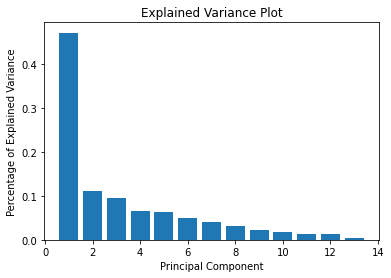

In [ ]:
plt.bar(x = range(1,len(Variance)+1),height = Variance['Erklärte Varianz'])
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Explained Variance Plot')
plt.show()

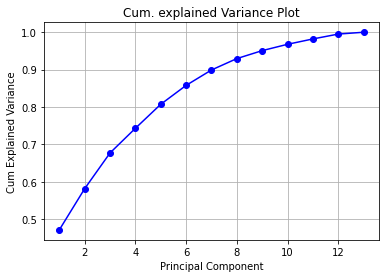

In [ ]:
plt.plot(range(1,len(Variance)+1), Variance['kumulierte erklärte Varianz'], 'bo-')
plt.grid()
plt.ylabel('Cum Explained Variance')
plt.xlabel('Principal Component')
plt.title('Cum. explained Variance Plot')
plt.show()



---



c. Berechnen Sie den Korrelationskoeffizienten der Projektionen auf die ersten drei Hauptkomponenten
mit den ursprünglichen Variablen. Interpretieren Sie Ihr Ergebnis.

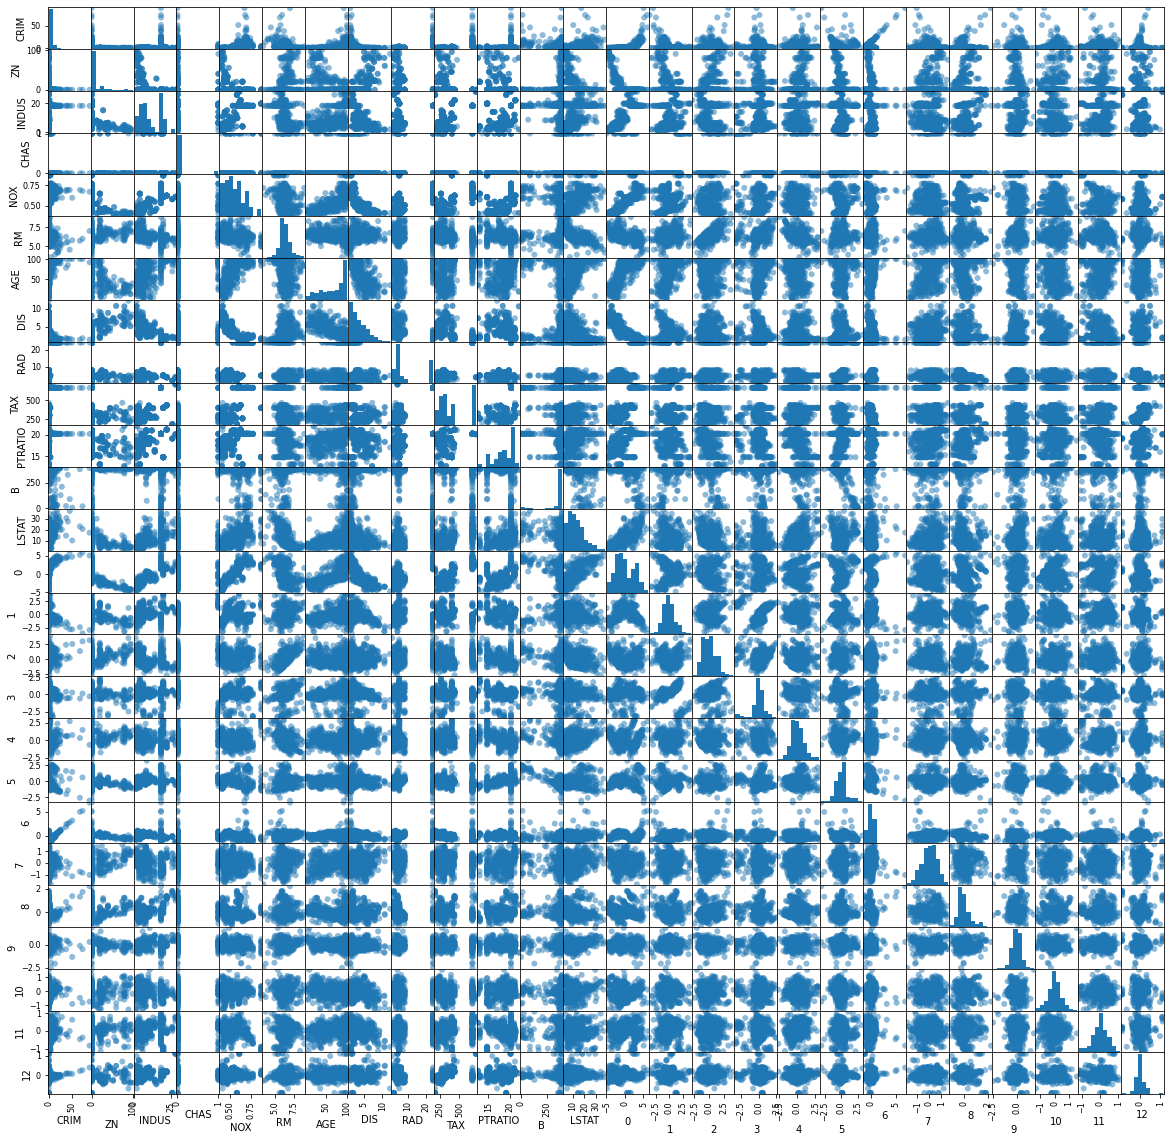

In [ ]:
U = pd.DataFrame(data = PCA[1])
UD = pd.DataFrame(data = PCA[2])
#bostonPCA = boston, U
bostonPCA = boston.join(UD)
pd.plotting.scatter_matrix(bostonPCA, figsize=(20,20), marker='o');

In [ ]:
corr = bostonPCA.corr()
corr.iloc[:13,13:29]

,0,1,2,3,4,5,6,7,8,9,10,11,12
CRIM,0.621167,-0.377418,0.274854,-0.057203,0.075065,-0.178101,0.568960,-0.096513,0.137031,-0.009090,-0.047289,-0.035699,0.011580
ZN,-0.634442,-0.387068,0.329801,-0.119194,0.292942,-0.262205,-0.201209,0.253432,0.188471,-0.125549,0.113325,0.029389,-0.020392
INDUS,0.858099,0.134676,-0.017775,-0.015878,-0.007137,-0.061733,-0.248461,-0.109466,0.339127,0.170604,-0.130755,0.046578,-0.063274
CHAS,0.012481,0.544519,0.323027,-0.755605,0.079062,0.135802,0.054244,0.015521,-0.007224,0.002901,0.006006,0.001639,0.009053
NOX,0.848644,0.262324,0.134842,0.118744,0.125041,-0.124039,-0.146069,-0.050425,-0.009747,-0.108434,0.048011,-0.330950,0.010995
RM,-0.468422,0.178779,0.662105,0.259843,-0.386896,0.048054,0.046784,0.205646,0.025207,0.202463,0.022928,-0.062902,0.011483
AGE,0.776412,0.373498,-0.019703,0.162250,0.015250,-0.058142,0.084883,0.378135,-0.035555,-0.170250,-0.198033,0.087204,-0.009715
DIS,-0.795901,-0.417905,-0.055442,-0.199505,0.090082,0.019004,-0.076022,0.076664,-0.080670,0.080349,-0.300048,-0.160858,-0.004611
RAD,0.791566,-0.325063,0.320211,-0.122563,-0.186512,-0.116103,-0.100930,-0.050575,-0.247808,-0.010282,0.015761,0.044037,-0.159646
TAX,0.837795,-0.286673,0.246070,-0.095694,-0.119200,-0.156432,-0.230396,-0.052095,-0.092917,0.016504,-0.045215,0.088543,0.181506


**Interpretation: 
Die erste Hauptkomponente korreleiert stark mit fast allen ursprünglichen Variablen.**



---



d. Stellen Sie die ersten beiden der neuen Variablen als Scatterplot dar (am besten in
Pandas-Dataframe importieren). Plotten Sie dabei alle Datenpunkte mit einem Hauspreis
oberhalb des Medians aller Hauspreise in einer anderen Farbe als die Datenpunkte unterhalb.
Eignen sich die beiden neuen Variablen zur Vorhersage des Hauspreises?

In [ ]:
medianTGT = boston_all["TGT"].median()
medianTGT

21.2

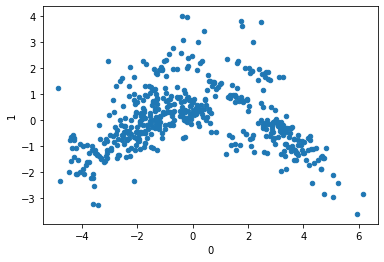

In [ ]:
#scatter =U.plot.scatter(x = 0, y = 1)
scatter = UD.plot.scatter(x = 0, y = 1)
scatter

In [ ]:
bostonPCA["TGTHigh"]=np.where(boston_all["TGT"]>=medianTGT, True, False)

In [ ]:
bostonPCA["TGTHigh"]

0       True
1       True
2       True
3       True
4       True
       ...  
501     True
502    False
503     True
504     True
505    False
Name: TGTHigh, Length: 506, dtype: bool

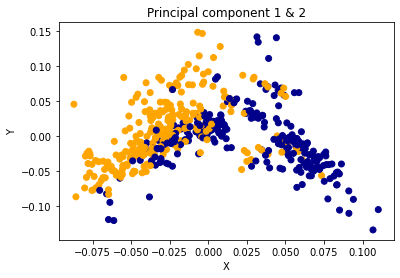

In [ ]:
color = ['orange' if element==True else 'darkblue' for element in bostonPCA["TGTHigh"]]
scatter=plt.scatter(x=U[0], y=U[1], c=color)
plt.title("Principal component 1 & 2")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

Eignen sich die beiden neuen Variablen zur Vorhersage des Hauspreises?

**Insbesondere die PC1 eignet sich eher gut, um die Preise vorherzusagen. Werte von <0 weisen auf einen Preis über dem Median hin.**